<a href="https://colab.research.google.com/github/SophistryDude/DS-Unit-1-Build/blob/master/Nick_Major's_unit_1_Build_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Creation of Word Clouds by Psychological Type ###
I have found a dataset that logs comments based on that persons self identified MBTI type. We're going to use that data to see if we can discern any notable distinctions between the types. 

In [37]:
#Imports.

!pip install -q wordcloud
import wordcloud
# this import will be doing most of the heavy lifting. 
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Standard imports.

#from collections import Counter 
#Counter is the tool that we use to count the iterations of each word. There is a counter function built into wordcloud as well. 

import spacy 
from spacy.tokenizer import Tokenizer
#Spacy helps filter common words.

# Here's our dataframe
mbti_1= pd.read_csv('/content/drive/My Drive/Lambda/Build Week Projects/Unit 1 Build week/mbti_1.csv')

#In order to make the word cloud different for each type we need to remove some words that show up but don't help. 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)
nltk.download('punkt')
nltk.download('stopwords')
stop = (stopwords.words('english'))
stop.append("i'm")
stop.append("I'm")
stop.append("like")
stop.append("-")




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
#Here we can see what our dataframe looks like; it's only 2 columns, the first is their psychological type, the second is the post that they made
mbti_1.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [39]:
# Here we're grouping together the rows based on the type column and creating a dictionary for each of those types.
types_dict = {}
for i in range(len(mbti_1['type'])):
    if mbti_1['type'][i] not in types_dict:
        types_dict[mbti_1['type'][i]] = [mbti_1['posts'][i]]
    else:
        types_dict[mbti_1['type'][i]].append(mbti_1['posts'][i])

In [40]:
# Here we are turning every word into it's own variable, then taking out seperators like spaces and commas. This leaves us with a group of singleton words that haven't been filtered out already by our stopwords. 
def bubble_words(personality):
    all_words = []
    
    for x in range(len(types_dict.get(personality))):
        posts = types_dict.get(personality)[x].lower().split("|||")
        words = []
        for post in posts:
            words += post.split()
        words = [w for w in words]
        for word in words:
            word = word.replace(".","")
            word = word.replace("'","")
            word = word.replace(",","")
            word = word.replace(":","")
            word = word.replace(";","")
            word = word.replace("!","")
        
        all_words = all_words + words
    return all_words

In [41]:
# here we are creating the parameters for the word cloud. 
def cloud(all_words):
    text = " ".join(all_words)
    #We augment nltk's stopwords to filter out for the name of the types. This data specifically comes from posts where people identify with their type. 
    stop_words = ["INTP", "intp", "ENTP", "entp", "INTJ", "intj", "entj", "ENTJ", "ISFJ", "isfj", "ESFJ", "esfj", "ISFP", "isfp", "esfp", "ESFP", "ESTJ", "estj", "istj", "ISTJ", "ENFP", "enfp", "infp", "INFP", "INFJ", "infj", "ENFJ", "enfj", "ESTP", "estp", "istp", "ISTP"] + list(stop)
    wc = wordcloud.WordCloud(stopwords = stop_words, max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    

### Cloudy ###
These are the word clouds for each type. The most notable observation is the common words throughout the 16 types. 


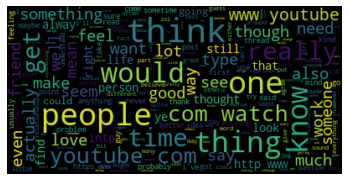

In [42]:
intp = bubble_words('INTP')
cloud(intp)


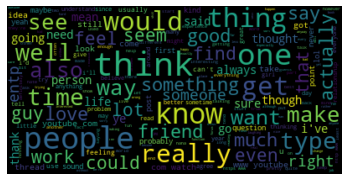

In [43]:
entp = bubble_words('ENTP')
cloud(entp)

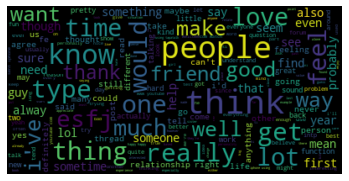

In [44]:
esfj = bubble_words('ESFJ')
cloud(esfj)

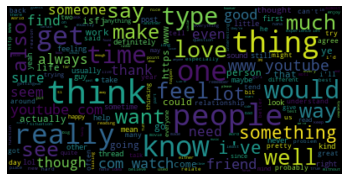

In [45]:
isfj = bubble_words('ISFJ')
cloud(isfj)

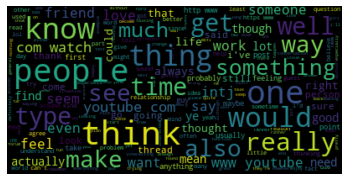

In [46]:
intj = bubble_words('INTJ')
cloud(intj)

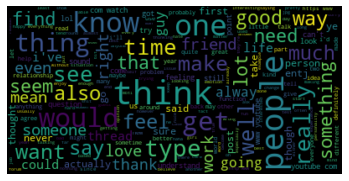

In [47]:
entj = bubble_words('ENTJ')
cloud(entj)

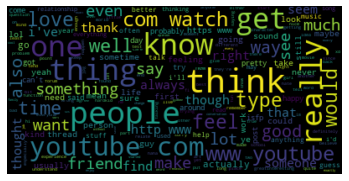

In [48]:
isfp = bubble_words('ISFP')
cloud(isfp)

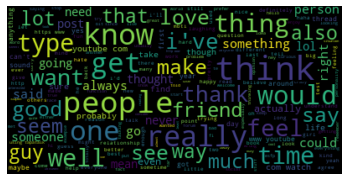

In [49]:
esfp = bubble_words('ESFP')
cloud(esfp)

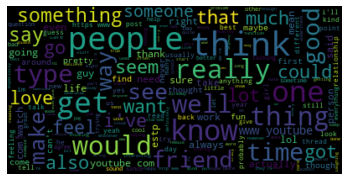

In [50]:
estp = bubble_words('ESTP')
cloud(estp)

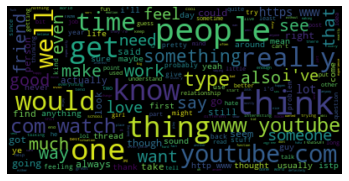

In [51]:
istp = bubble_words('ISTP')
cloud(istp)

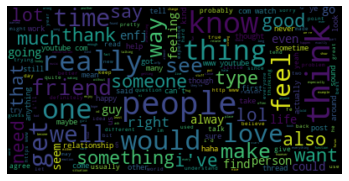

In [52]:
enfj = bubble_words('ENFJ')
cloud(enfj)

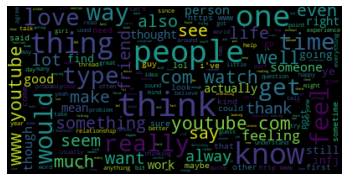

In [53]:
infj = bubble_words('INFJ')
cloud(infj)

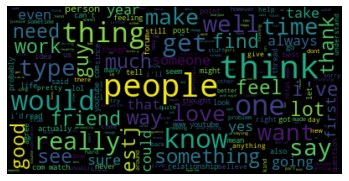

In [54]:
estj = bubble_words('ESTJ')
cloud(estj)

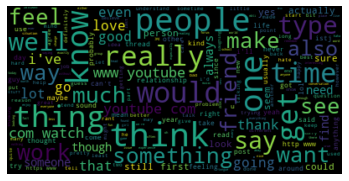

In [55]:
istj = bubble_words('ISTJ')
cloud(istj)

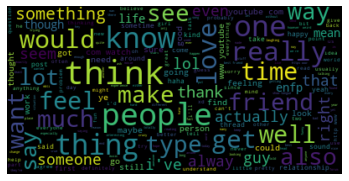

In [56]:
enfp = bubble_words('ENFP')
cloud(enfp)

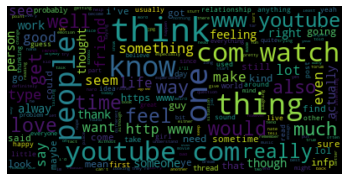

In [57]:
infp = bubble_words('INFP')
cloud(infp)

### not so cloudy ###

In [58]:
# Next we need to create a list for our most common words, so instead of plotting the wordcloud, we're usine the built in .words_ function to generate a list. 
def cloud_words(all_words):
    text = " ".join(all_words)
    wc = wordcloud.WordCloud(max_font_size=40).generate(text)
    y = wc.words_
    
    return pd.DataFrame.from_dict(y, orient= 'index', columns = ['Rate'])

In [59]:
# I wasn't able to get this function to generate the dataframes with the appropriate name from the list, but this function does run the cloud_words function and creates a dataframe for each type based on the list.
list_of_types = [intp, entp, isfj, esfj, intj, entj, esfp, isfp, estj, istj, enfp, infp, estp, istp, enfj, infj]
dataframes = []
for i, a in enumerate(list_of_types):
  # exec(f'df_{a} = cloud_words(a)')
  dataframes.append(cloud_words(a))
  dataframes[i] = dataframes[i].reset_index()
  dataframes[i] = dataframes[i].rename(columns = {'index':'Word'})                    
  
print(dataframes[0].head())  
#dataframes[]


     Word      Rate
0   think  1.000000
1  people  0.810204
2    intp  0.800279
3     one  0.791398
4   thing  0.685878


In [70]:
#The dataframes from the above list were generated as dataframe[i]. So we change their name to represent their type.
entj_df = dataframes[5]
intj_df = dataframes[4]
isfj_df = dataframes[2]
esfj_df = dataframes[3]
isfp_df = dataframes[7]
esfp_df = dataframes[6]
istj_df = dataframes[9]
estj_df = dataframes[8]
infp_df = dataframes[11]
enfp_df = dataframes[10]
istp_df = dataframes[13]
estp_df = dataframes[12]
infj_df = dataframes[15]
enfj_df = dataframes[14]
intp_df = dataframes[0]
entp_df = dataframes[1]

In [71]:
Type_df1 = pd.concat([intp_df, entp_df, isfj_df, esfj_df, intj_df, entj_df, isfp_df, esfp_df, estj_df, istj_df])
Type_df2 = pd.concat([infp_df, enfp_df, estp_df, istp_df, infj_df, enfj_df])
Type_df = pd.concat([Type_df1, Type_df2])

In [72]:
Type_df.head()

,Word,Rate
0,think,1.000000
1,people,0.810204
2,intp,0.800279
3,one,0.791398
4,thing,0.685878


In [73]:
# And here we create the database of most common words in descending order. There are certain words that are known to have a high correlation with specific types, or else this is where I would cut the top x words. 
Final_Type_df = Type_df.groupby('Word')['Rate'].sum().sort_values(ascending=False)
Final_Type_df.head(30)

Word
think            15.863419
people           13.096583
one              11.659151
know             10.714928
thing            10.201700
really            9.184218
time              7.824795
well              7.287876
type              7.279364
say               7.143354
love              6.531460
feel              6.471230
see               6.312247
way               6.240749
make              6.212845
want              6.132574
something         6.096715
much              5.938641
will              5.496479
good              5.393876
friend            5.372950
youtube watch     5.224566
lot               5.195401
someone           4.958383
even              4.708401
seem              4.669332
thank             4.477725
now               4.456971
work              4.396613
need              4.375414
Name: Rate, dtype: float64

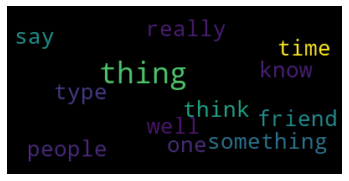

In [74]:
#Let's create a visual representation of the words that don't tell us anything about the types. 
text = ["think", "people", "one", "know", "thing", "really", "time", "well", "type", "say", "something", "would", "friend", "things"]
unique_string = (" ").join(text)
wc = wordcloud.WordCloud(max_font_size=35).generate(unique_string)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

#display and save
# plt.imshow(cloud, interpolation="bilinear")
# plt.axis("off")
# plt.savefig('.../path...newPNGName.png'.format(cloud))
# plt.show()

In [75]:
#We're going to use our common words listed above to have the ability to generate new clouds. For the sake of brevity I'll show the examples I used in the blog. 
def clean_cloud(all_words):
    text = " ".join(all_words)
    stop_words = ["think", "people", "one", "know", "thing", "really", "time", "well", "type", "say", "something", "would", "friend", "things", "INTP", "intp", "ENTP", "entp", "INTJ", "intj", "entj", "ENTJ", "ISFJ", "isfj", "ESFJ", "esfj", "ISFP", "isfp", "esfp", "ESFP", "ESTJ", "estj", "istj", "ISTJ", "ENFP", "enfp", "infp", "INFP", "INFJ", "infj", "ENFJ", "enfj", "ESTP", "estp", "istp", "ISTP"] + list(stop)

    wc = wordcloud.WordCloud(stopwords = stop_words, max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()



In [66]:
# Once again we want the list of most common words as a dataframe. This time we are taking out the words that every type uses. 
def clean_cloud_words(all_words):
    text = " ".join(all_words)
    stop_words = ["think", "people", "one", "know", "thing", "really", "time", "well", "type", "say", "something", "would", "friend", "things", "INTP", "intp", "ENTP", "entp", "INTJ", "intj", "entj", "ENTJ", "ISFJ", "isfj", "ESFJ", "esfj", "ISFP", "isfp", "esfp", "ESFP", "ESTJ", "estj", "istj", "ISTJ", "ENFP", "enfp", "infp", "INFP", "INFJ", "infj", "ENFJ", "enfj", "ESTP", "estp", "istp", "ISTP"] + list(stop)
    wc = wordcloud.WordCloud(stopwords = stop_words, max_font_size=40).generate(text)
    y = wc.words_
    
    return pd.DataFrame.from_dict(y, orient= 'index', columns = ['Rate'])

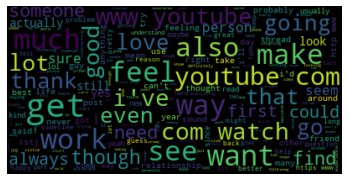

In [67]:
# Here's the visual illustration of ISTJ for the blog
clean_cloud(istj)


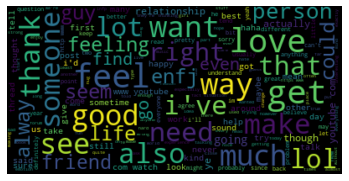

In [68]:
# Here's the visual illustration of ENFJ for the blog
clean_cloud(enfj)